In [1]:
#langkah pertama kita import library yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
#lalu kita import dataset, kali ini saya meminjam dataset dari DQLab Academy
url = 'https://academy.dqlab.id/dataset/customer_segments.txt'
df = pd.read_csv(url, sep='\t')
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [3]:
#lihat sedikit ke dalam data kita
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


In [4]:
#Cari tahu ada nilai unik apa saja didalam colom
print(df['Tipe Residen'].value_counts())
print(df['Profesi'].value_counts())

Cluster    32
Sector     18
Name: Tipe Residen, dtype: int64
Wiraswasta          20
Professional        18
Ibu Rumah Tangga     7
Pelajar              3
Mahasiswa            2
Name: Profesi, dtype: int64


In [5]:
#ketiga kolom tersebut berjenis object yang tidak bisa dibaca oleh algoritma, ubah menjadi integer
df = pd.get_dummies(df, columns = ['Jenis Kelamin', 'Tipe Residen'])

In [6]:
#kolom profesi juga berjenis object bertingkat, ubah menjadi integer
Profesi = {
    'Ibu Rumah Tangga' : 1,
    'Pelajar' : 2,
    'Mahasiswa' : 3,
    'Professional' : 4,
    'Wiraswasta' : 5
}

df = df.replace({"Profesi": Profesi})

In [7]:
#data sudah rapi, mari kita buang colom nama dan costumer id karena tidak dibutuhkan
df = df.drop(['Customer_ID', 'Nama Pelanggan'], axis = 1)

In [8]:
#kolom nilai belanja pertahun cukup besar, mari kita normalisasikan agar tidak terlalu memberatkan kinerja
df['NilaiBelanjaSetahun'] = df['NilaiBelanjaSetahun'] / 1000000

In [9]:
#lihat data yang sudah di preprocessing
df.head()

,Umur,Profesi,NilaiBelanjaSetahun,Jenis Kelamin_Pria,Jenis Kelamin_Wanita,Tipe Residen_Cluster,Tipe Residen_Sector
0,58,5,9.497927,1,0,0,1
1,14,2,2.722700,0,1,1,0
2,48,4,5.286429,1,0,1,0
3,53,4,5.204498,1,0,1,0
4,41,5,10.615206,0,1,1,0


In [10]:
#bagi data untuk data test dan data training
df, databaru = train_test_split(df, test_size=0.20)

In [11]:
#mari kita lihat bagaimana data test
#terlihat sudah menjadi 40 baris, karena 10 barisnya dipakai untuk data test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 8 to 19
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Umur                  40 non-null     int64  
 1   Profesi               40 non-null     int64  
 2   NilaiBelanjaSetahun   40 non-null     float64
 3   Jenis Kelamin_Pria    40 non-null     uint8  
 4   Jenis Kelamin_Wanita  40 non-null     uint8  
 5   Tipe Residen_Cluster  40 non-null     uint8  
 6   Tipe Residen_Sector   40 non-null     uint8  
dtypes: float64(1), int64(2), uint8(4)
memory usage: 1.4 KB


In [12]:
#data sudah siap mari kita masukkan ke dalam model
#sebelum kita mengaplikasikan model, kita butuh mencari parameter terbaik
Sum_of_square = []
Cluster = range(1,10)
for k in Cluster:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    Sum_of_square.append(km.inertia_)

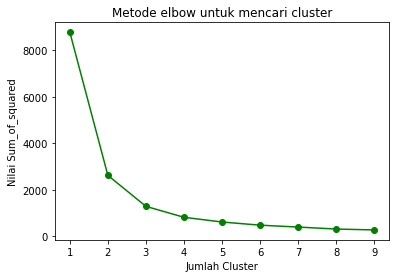

In [13]:
plt.plot(Cluster, Sum_of_square, 'go-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Nilai Sum_of_squared')
plt.title('Metode elbow untuk mencari cluster')
plt.show()

#### Terlihat bahwa titik elbow ada di cluster ke 3, maka kita buat jumlah cluster kita menjadi 3

In [14]:
#mulai training data kita
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
labels = kmeans.labels_

In [16]:
#masukkan hasil training ke dalam dataframe
df['cluster'] = labels

In [17]:
#lihat dataframe yang sudah ditambahkan cluster
df.head()

,Umur,Profesi,NilaiBelanjaSetahun,Jenis Kelamin_Pria,Jenis Kelamin_Wanita,Tipe Residen_Cluster,Tipe Residen_Sector,cluster
8,29,4,5.993218,0,1,0,1,1
34,39,4,5.962575,0,1,0,1,1
22,34,4,5.239290,1,0,1,0,1
26,35,5,9.114159,0,1,1,0,1
0,58,5,9.497927,1,0,0,1,0


In [22]:
#mari kita intip sedikit data kita, misal kita ingin melihat data cluster ke 1,2 atau 3, kali ini saya ingit melihat sedikit data di cluster ke 2
cluster_ = df['cluster'] == 2
df_ = df[cluster_]
df_.head()

,Umur,Profesi,NilaiBelanjaSetahun,Jenis Kelamin_Pria,Jenis Kelamin_Wanita,Tipe Residen_Cluster,Tipe Residen_Sector,cluster
14,20,5,10.365668,0,1,1,0,2
1,14,2,2.722700,0,1,1,0,2
33,21,5,9.759822,0,1,0,1,2
39,14,2,2.861855,0,1,0,1,2
32,19,3,3.047926,0,1,1,0,2


In [23]:
df_.describe()
#dengan method describe kita bisa melihat info lengkap soal data kita, contoh pada cluster ke 2..
#semua data ternyata berjenis kelamin perempuan, rata2 berada di umur 18an, dan nilai belanja rata2 pertahun di kisaran 5jt an..

,Umur,Profesi,NilaiBelanjaSetahun,Jenis Kelamin_Pria,Jenis Kelamin_Wanita,Tipe Residen_Cluster,Tipe Residen_Sector,cluster
count,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.0
mean,18.900000,3.400000,5.038195,0.0,1.0,0.700000,0.300000,2.0
std,3.314949,1.173788,2.856017,0.0,0.0,0.483046,0.483046,0.0
min,14.000000,2.000000,2.722700,0.0,1.0,0.000000,0.000000,2.0
25%,16.750000,2.250000,2.933327,0.0,1.0,0.250000,0.000000,2.0
50%,19.500000,3.500000,4.129484,0.0,1.0,1.000000,0.000000,2.0
75%,20.750000,4.000000,5.247217,0.0,1.0,1.000000,0.750000,2.0
max,24.000000,5.000000,10.365668,0.0,1.0,1.000000,1.000000,2.0


In [24]:
#kita lihat kembali databaru yang akan di test
databaru

,Umur,Profesi,NilaiBelanjaSetahun,Jenis Kelamin_Pria,Jenis Kelamin_Wanita,Tipe Residen_Cluster,Tipe Residen_Sector
43,18,5,9.339737,0,1,1,0
45,25,5,10.099807,0,1,0,1
21,52,4,5.298157,0,1,1,0
11,49,4,5.941914,0,1,0,1
36,25,4,5.972787,0,1,0,1
23,39,5,10.259572,0,1,1,0
49,55,5,10.569316,0,1,0,1
2,48,4,5.286429,1,0,1,0
13,60,5,9.471615,1,0,1,0
40,24,1,6.820976,0,1,1,0


In [27]:
#mari kita prediksi cluster dari databaru kita
kmeans.predict(databaru)

array([2, 2, 0, 0, 2, 1, 0, 0, 0, 2])

In [28]:
#tambahkan prediksi cluster ke dataframe
label2 = kmeans.predict(databaru).tolist()
databaru['cluster'] = label2
databaru

,Umur,Profesi,NilaiBelanjaSetahun,Jenis Kelamin_Pria,Jenis Kelamin_Wanita,Tipe Residen_Cluster,Tipe Residen_Sector,cluster
43,18,5,9.339737,0,1,1,0,2
45,25,5,10.099807,0,1,0,1,2
21,52,4,5.298157,0,1,1,0,0
11,49,4,5.941914,0,1,0,1,0
36,25,4,5.972787,0,1,0,1,2
23,39,5,10.259572,0,1,1,0,1
49,55,5,10.569316,0,1,0,1,0
2,48,4,5.286429,1,0,1,0,0
13,60,5,9.471615,1,0,1,0,0
40,24,1,6.820976,0,1,1,0,2


## SELESAI.. Kita sudah bisa memprediksi akan masuk kategori mana seseorang berdasarkan ciri2 identitasnya, Terimakasih telah menyaksikan sampai akhir..